In [12]:
import numpy as np
import matplotlib.pyplot as plt


In [14]:
from utils import *
%matplotlib inline

# Here we are using mushroom data to detect whether it is edible or not

# The mushroom is one hot encoded into three features namely brown colour ( 0 for red cap or 1) , tapering shape(0 or 1)
# solitary ( 1 or 0)
# y _train is whether the mushroom is edible or not(1 or 0)

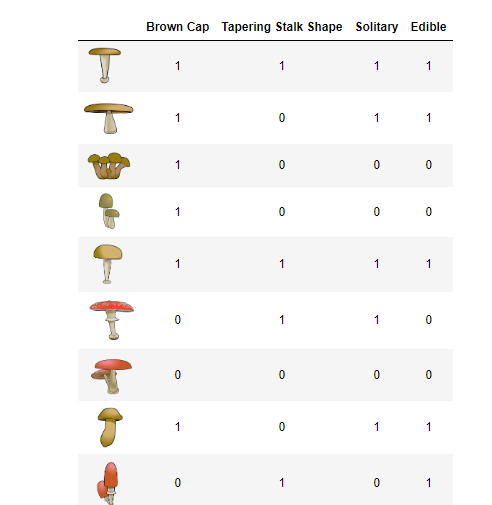

In [15]:
X_train = np.array([[1,1,1],[1,0,1],[1,0,0],[1,0,0],[1,1,1],[0,1,1],[0,0,0],[1,0,1],[0,1,0],[1,0,0]])
y_train = np.array([1,1,0,0,1,0,0,1,1,0])



In [16]:
print(X_train.shape)
print(y_train.shape)

(10, 3)
(10,)


# Calculating entropy

In [ ]:
def compute_entropy(y):
    entropy = 0
    if len(y)!= 0:
        p1 = len(y[y==1])/ len(y)
        if p1 != 0 and p1 != 1:
            entropy = -p1 * np.log2(p1) - (1 - p1) * np.log2(1 - p1)
        else:
            entropy = 0
    return entropy
            

In [19]:
print("Entropy at root node: ", compute_entropy(y_train))

Entropy at root node:  1.0


# Splitting the dataset


In [20]:
def split_dataset(X,node_indices,feature):
    left_indices = []
    right_indices = []
    
    for i in node_indices:
        if X[i][feature] == 1:
            left_indices.append(i)
        else:
            right_indices.append(i)
    return left_indices,right_indices
    

In [21]:
root_indices = [0,1,2,3,4,5,6,7,8,9]

# there are three features namely indices 0(brown cap),1(Tapering Stalk) or 2(Solitary)
feature = 0
left_indices,right_indices = split_dataset(X_train,root_indices,feature)
print("Based on feature brown or red cap")
print("left indices: ", left_indices)
print("Right indices: ",right_indices)


Based on feature brown or red cap
left indices:  [0, 1, 2, 3, 4, 7, 9]
Right indices:  [5, 6, 8]


# Computing Information Gain

In [22]:
def compute_information_gain(X,y,node_indices,feature):
    
    left_indices, right_indices = split_dataset(X, node_indices,feature)
    X_node,y_node = X[node_indices],y[node_indices]
    X_left,y_left = X[left_indices],y[left_indices]
    X_right,y_right = X[right_indices],y[right_indices]
    
    information_gain = 0
    
    node_entropy = compute_entropy(y_node)
    left_entropy = compute_entropy(y_left)
    right_entropy = compute_entropy(y_right)
    w_left = len(X_left)/len(X_node)
    w_right = len(X_right)/len(X_node)
    weighted_entropy = w_left * left_entropy + w_right * right_entropy
    information_gain = node_entropy - weighted_entropy
    return information_gain

In [24]:
info_gain0 = compute_information_gain(X_train,y_train,root_indices,feature=0)
print("Information Gain from splitting the root on brown cap: ", info_gain0)

info_gain1 = compute_information_gain(X_train,y_train,root_indices,feature=1)
print("Information Gain from splitting the root on tapering stalk shape: ", info_gain1)

info_gain2 = compute_information_gain(X_train,y_train,root_indices,feature=2)
print("Information Gain from splitting the root on solitary: ", info_gain2)



Information Gain from splitting the root on brown cap:  0.034851554559677034
Information Gain from splitting the root on tapering stalk shape:  0.12451124978365313
Information Gain from splitting the root on solitary:  0.2780719051126377


# Getting Best Split

In [26]:
def get_best_split(X,y,node_indices):
    num_features = X.shape[1]
    best_feature = -1
    max_info_gain = 0
    for feature in range(num_features):
        info_gain = compute_information_gain(X,y,root_indices,feature)
        if info_gain > max_info_gain:
            max_info_gain = info_gain
            best_feature = feature
    return best_feature
        
    

In [27]:
best_feature = get_best_split(X_train, y_train, root_indices)
print("Best feature to split on: %d" % best_feature)



Best feature to split on: 2


In [28]:
# Therefore we see that the best feature to split on has index 2 or the feature is solitary(0 or 1)

# Building the tree

In [33]:
tree = []
def build_tree_recursive(X,y,node_indices,branch_name,max_depth,current_depth):
    
    if current_depth == max_depth:
        formatting = " "*current_depth + "-"*current_depth
        print(formatting, "%s leaf node with indices" % branch_name, node_indices)
        return
    print(node_indices)
    best_feature = get_best_split(X,y,node_indices)
    print(best_feature)
    formatting = "-"*current_depth
    print("%s Depth %d, %s: Split on feature: %d" % (formatting, current_depth, branch_name, best_feature))
    left_indices, right_indices = split_dataset(X, node_indices, best_feature)
    tree.append((left_indices, right_indices, best_feature))
    
    build_tree_recursive(X, y, left_indices, "Left", max_depth, current_depth+1)
    build_tree_recursive(X, y, right_indices, "Right", max_depth, current_depth+1)

In [34]:
build_tree_recursive(X_train, y_train, root_indices, "Root", max_depth=2, current_depth=0)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
2
 Depth 0, Root: Split on feature: 2
[0, 1, 4, 5, 7]
2
- Depth 1, Left: Split on feature: 2
  -- Left leaf node with indices [0, 1, 4, 5, 7]
  -- Right leaf node with indices []
[2, 3, 6, 8, 9]
2
- Depth 1, Right: Split on feature: 2
  -- Left leaf node with indices []
  -- Right leaf node with indices [2, 3, 6, 8, 9]
